https://towardsdatascience.com/the-fwl-theorem-or-how-to-make-all-regressions-intuitive-59f801eb3299

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [8]:
n = 100
df = pd

df = pd.DataFrame()

#We make a list of incomes 
income = np.random.normal(1000,100,n)
label1 = "Income"
df[label1] = income.tolist()

#We compute the spending of households
spending = income*0.5 + np.random.normal(500,100,n)
label2 = "Spending"
df[label2] = spending.tolist()

#We compute the spending of households
popularity = income*0.6 + spending*0.7
label3 = "Popularity"
df[label3] = popularity.tolist()

df['Lpopularity'] = np.log(popularity)
df['Lincome'] = np.log(income)

#We the minimum and maximum of variables so that it is easier to plot
minimum = min([min(income),min(spending)])
maximum = max([max(income),max(spending)])
#This creates equal spaces between the minimum and maximum
bins = np.linspace(minimum, maximum , 30)

In [9]:
df

,Income,Spending,Popularity,Lpopularity,Lincome
0,985.626616,984.500588,591.375970,6.382452,6.893278
1,901.280922,831.779942,540.768553,6.292991,6.803817
2,1035.990754,1112.470599,621.594453,6.432288,6.943113
3,1034.520357,1037.927372,620.712214,6.430868,6.941693
4,1081.556799,1162.390539,648.934079,6.475331,6.986157
...,...,...,...,...,...
95,992.411398,804.099675,595.446839,6.389312,6.900138
96,1017.393126,929.566406,610.435876,6.414173,6.924999
97,1038.243368,955.480236,622.946021,6.434460,6.945285
98,1187.130645,1075.416599,712.278387,6.568469,7.079294


Text(0.5, 1.0, 'Income and spending')

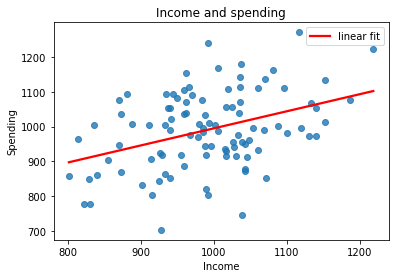

In [10]:
sns.regplot(x="Income", y="Spending", data = df, ci=False, line_kws={'color':'r', 'label':'linear fit'})
plt.legend()
plt.title("Income and spending")

In [11]:
#Normal two variable estimation
smf.ols('Lpopularity ~ spending + Lincome', df).fit().summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.5108,2.74e-13,-1.86e+12,0.000,-0.511,-0.511
spending,-2.255e-17,3.28e-17,-0.687,0.494,-8.77e-17,4.26e-17
Lincome,1.0000,4.14e-14,2.42e+13,0.000,1.000,1.000


In [20]:
#Regress spending on income
smf.ols('spending ~ income', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,311.6058,101.576,3.068,0.003,110.031,513.180
income,0.6901,0.102,6.750,0.000,0.487,0.893


In [22]:
#Use the spending on income regression to construct the u hat
df['spending_tilde'] = smf.ols('spending ~ income', df).fit().resid

#Use the u hat to get the regression
smf.ols('Popularity ~ spending_tilde ', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1289.4555,10.274,125.510,0.000,1269.068,1309.843
spending_tilde,0.7000,0.108,6.475,0.000,0.485,0.915


In [25]:
#Lets try the opposite way
df['popularity_tilde'] = smf.ols('popularity ~ income', df).fit().resid
smf.ols('popularity_tilde ~ spending_tilde ', df).fit().summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.528e-13,1.34e-14,-11.424,0.000,-1.79e-13,-1.26e-13
spending_tilde,0.7000,1.41e-16,4.97e+15,0.000,0.700,0.700


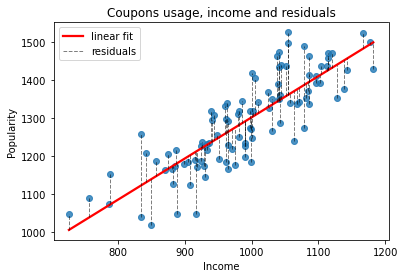

In [31]:

df["popularity_tilde"] = smf.ols('popularity ~ income', df).fit().predict()

ax = sns.regplot(x="Income", y="Popularity", data=df, ci=False, line_kws={'color':'r', 'label':'linear fit'})

ax.vlines(df["Income"], 
   np.minimum(df["Popularity"], df["popularity_tilde"]), 
   np.maximum(df["Popularity"], df["popularity_tilde"]), 
   linestyle='--', color='k', alpha=0.5, linewidth=1, label="residuals")

plt.legend()
plt.title(f"Coupons usage, income and residuals");